In [1]:
from matplotlib import pyplot as plt
import numpy as np
from time import time
from os.path import abspath, join
import sys
from glob import glob
import vaex
from hammer import no
root_dir = abspath(join('..', '..'))
data_dir = join(root_dir, 'Data')
sys.path.append(root_dir)
from utils import (plot_corner, plot_chain, plot_fit, style, calculate_probs, get_params)

# 2 comp

In [2]:
style()

In [3]:
zfiles = glob(join(root_dir, 'Data', 'Effective-Volume', 'z*.hdf5'))
zfiles.sort()
wfiles = glob(join(root_dir, 'Data', 'Velocity-Distribution', 'w*.hdf5'))
wfiles.sort()
zfiles, wfiles

(['/home2/s20321005/Thesis-Project/Data/Effective-Volume/z_(-0.10)_(0.10).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume/z_(0.10)_(0.16).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume/z_(0.16)_(0.20).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume/z_(0.20)_(0.23).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume/z_(0.23)_(0.26).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume/z_(0.26)_(0.28).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume/z_(0.28)_(0.30).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume/z_(0.30)_(0.32).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume/z_(0.32)_(0.34).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume/z_(0.34)_(0.36).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume/z_(0.36)_(0.37).hdf5',
  '/home2/s20321005/Thesis-Project/Data/Effective-Volume/z_(0.37)_(0.39).hdf5',
  '/home2/s20321005/Thesis-Project/Data

In [4]:
index = 0
zfile = zfiles[index]
wfile = wfiles[index]
zdata = vaex.open(zfile)
zmid = zdata['zmid'].to_numpy()
znum = zdata['znum'].to_numpy()
zerr = zdata['zerr'].to_numpy()

wdata = vaex.open(wfile)
wmid = wdata['wmid'].to_numpy()
wnum = wdata['wnum'].to_numpy()
werr = wdata['werr'].to_numpy()

zdata = (zmid, znum, zerr)
wdata = (wmid, wnum, werr)

In [5]:
rhob = [
    0.0104, 0.0277, 0.0073, 0.0005, 0.0006, 0.0018,
    0.0018, 0.0029, 0.0072, 0.0216, 0.0056, 0.0015
]
sigmaz = [
    3.7, 7.1, 22.1, 39.0, 15.5, 7.5, 12.0, 
    18.0, 18.5, 18.5, 20.0, 20.0]
log_nu0 = [0]
R = [3.4E-3]
zsun = [30]
w0 = [-7.]
log_sigmaw1 = [np.log(5.)]
log_a1 = [np.log(.8)]
log_sigmaw2 = [np.log(10.)]
log_a2 = [np.log(0.2)]

theta = np.array([rhob + sigmaz + log_nu0 + R + zsun+w0 + log_sigmaw1 + log_a1 + log_sigmaw2 + log_a2]).flatten()
theta.shape

(32,)

In [6]:
locs = dict(
    log_nu0=-1,
    R=3.4E-3,
    zsun=-50,
    w0=-15,
    log_sigmaw1=np.log(1),
    log_a1=np.log(0.05),
    log_sigmaw2=np.log(1),
    log_a2=np.log(0.05),
)

scales = dict(
    log_nu0=3,
    R=0.6E-3,
    zsun=100,
    w0=15,
    log_sigmaw1=np.log(25)-locs['log_sigmaw1'],
    log_a1=np.log(2)-locs['log_a1'],
    log_sigmaw2=np.log(25)-locs['log_sigmaw2'],
    log_a2=np.log(2)-locs['log_a2'],
)

keys = list(locs.keys())
locs = np.array(list(locs.values()))
scales = np.array(list(scales.values()))

[(k, loc, th, s+loc) for k, loc, th, s in zip(keys, locs, theta[24:], scales)]

[('log_nu0', -1.0, 0.0, 2.0),
 ('R', 0.0034, 0.0034, 0.004),
 ('zsun', -50.0, 30.0, 50.0),
 ('w0', -15.0, -7.0, 0.0),
 ('log_sigmaw1', 0.0, 1.6094379124341003, 3.2188758248682006),
 ('log_a1', -2.995732273553991, -0.2231435513142097, 0.6931471805599454),
 ('log_sigmaw2', 0.0, 2.302585092994046, 3.2188758248682006),
 ('log_a2', -2.995732273553991, -1.6094379124341003, 0.6931471805599454)]

In [7]:
ndim = len(locs)+24
nwalkers = 2*ndim+2
ndim, nwalkers

(32, 66)

In [8]:
p0 = no.generate_p0(nwalkers, locs, scales, kind=2)
p0.shape

(66, 32)

In [9]:
for p in p0:
    print(no.log_prob(p, zdata, wdata, locs, scales))

(40.65528262390755, -7004.3438829833985)
(35.45874452010568, -3521.843844007007)
(44.69265008463079, -408.0162050175308)
(45.52792395523921, -398.754230364881)
(46.05511222395766, -20750.02034311233)
(44.9096603388083, -851.3815078901508)
(43.41526771161751, -254.36722814453026)
(45.60770691348428, -763.5180215109247)
(43.83479863778713, -2507.37119160149)
(39.322027259376846, -2013.8972945446455)
(45.48356656340987, -645.374849848555)
(35.6844918338698, -95.11208391713001)
(40.53325978884104, -66.04798720700958)
(39.051135286504305, -844.661000499803)
(38.526341568317164, -14118.94374415498)
(44.42362734218228, -9172.091775007711)
(41.62205655856973, -6590.422493231312)
(44.97854874001556, -9035.448114662731)
(39.940294153798604, -4069.6027112968727)
(48.136098365985106, -6.7542894368276905)
(44.94852768300688, -5750.037259796924)
(38.75968616147204, -5150.549662805103)
(41.062177482851304, -2029.8639765159721)
(41.558460165111306, -3519.141919361771)
(39.4919374562617, -3739.81947832

In [10]:
p0_flat = p0.reshape(-1, ndim)
no.log_prob_par(p0_flat, zdata, wdata, locs, scales)

array([[ 4.06552826e+01, -7.04499917e+03, -7.00434388e+03],
       [ 3.54587445e+01, -3.55730259e+03, -3.52184384e+03],
       [ 4.46926501e+01, -4.52708855e+02, -4.08016205e+02],
       [ 4.55279240e+01, -4.44282154e+02, -3.98754230e+02],
       [ 4.60551122e+01, -2.07960755e+04, -2.07500203e+04],
       [ 4.49096603e+01, -8.96291168e+02, -8.51381508e+02],
       [ 4.34152677e+01, -2.97782496e+02, -2.54367228e+02],
       [ 4.56077069e+01, -8.09125728e+02, -7.63518022e+02],
       [ 4.38347986e+01, -2.55120599e+03, -2.50737119e+03],
       [ 3.93220273e+01, -2.05321932e+03, -2.01389729e+03],
       [ 4.54835666e+01, -6.90858416e+02, -6.45374850e+02],
       [ 3.56844918e+01, -1.30796576e+02, -9.51120839e+01],
       [ 4.05332598e+01, -1.06581247e+02, -6.60479872e+01],
       [ 3.90511353e+01, -8.83712136e+02, -8.44661000e+02],
       [ 3.85263416e+01, -1.41574701e+04, -1.41189437e+04],
       [ 4.44236273e+01, -9.21651540e+03, -9.17209178e+03],
       [ 4.16220566e+01, -6.63204455e+03

(32,)


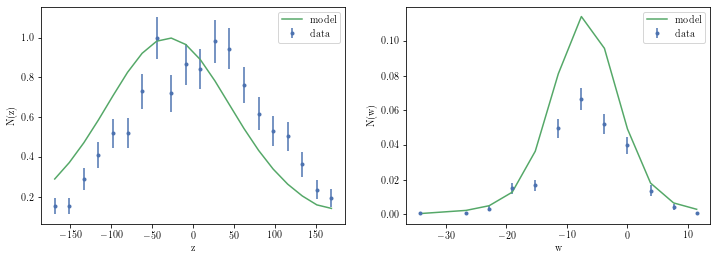

(54.63134921923049, -28.43622221438539)

In [12]:
print(theta.shape)
zmod = no.fz(zmid, theta)
wmod = no.fw(wmid, theta)

# plot
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].errorbar(zmid, znum, yerr=zerr, fmt='.', label='data')
ax[0].plot(zmid, zmod, label='model')
ax[0].set_xlabel('z')
ax[0].set_ylabel('N(z)')
ax[0].legend()
ax[1].errorbar(wmid, wnum, yerr=werr, fmt='.', label='data')
ax[1].plot(wmid, wmod, label='model')
ax[1].set_xlabel('w')
ax[1].set_ylabel('N(w)')
ax[1].legend()
plt.show()
no.log_prob(theta, zdata, wdata, locs, scales)

In [13]:
t0 = time()
chain = no.mcmc(500, nwalkers, p0, zdata, wdata, locs, scales, dz=1, verbose=True, parallel=True)
print(time() - t0, "s")
chain.shape

3.5500829219818115 s


(500, 66, 32)

In [14]:
calculate_probs(no, chain, ndim, zdata, wdata, locs, scales, batch=100)

array([[   43.40967344, -5141.0881009 , -5097.67842746],
       [   47.16636863, -1133.87418522, -1086.70781659],
       [   44.69265008,  -452.7088551 ,  -408.01620502],
       ...,
       [   42.06237119,    66.69526156,   108.75763276],
       [   44.87880474,    78.77345895,   123.65226369],
       [   40.18540165,    70.77780908,   110.96321073]])

100%|██████████| 9/9 [00:00<00:00, 44.95it/s]


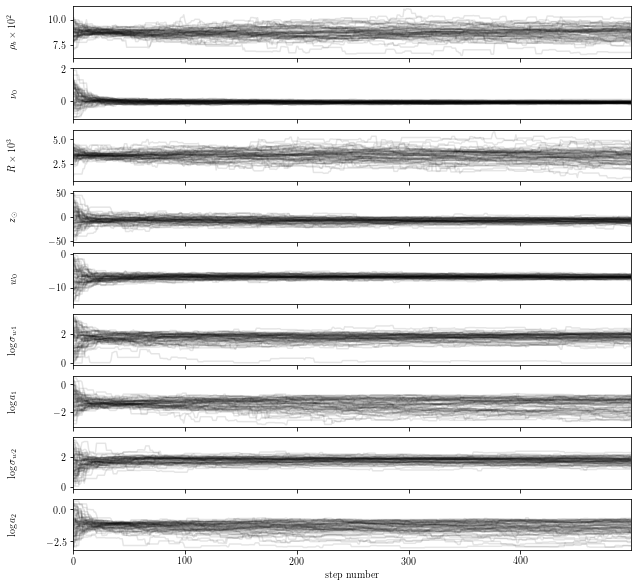

In [15]:
labels = [r'$\rho_b\times 10^2$', r'$\nu_0$', r'$R\times 10^3$', r'$z_{\odot}$', r'$w_0$', r'$\log \sigma_{w1}$', r'$\log a_1$', r'$\log \sigma_{w2}$', r'$\log a_2$']
labs = ['rhob', 'nu0', 'R', 'zsun', 'w0', 'log_sigmaw1', 'log_a1', 'log_sigmaw2', 'log_a2']
indexes = [12, 24, 25, 26, 27, 28, 29, 30, 31]

params = get_params(chain, indexes, labs)
plot_chain(params, labels, figsize=(10,10))

In [16]:
p0_next = chain[-1, :, :]
t0 = time()
chain = no.mcmc(2000, nwalkers, p0_next, zdata, wdata, locs, scales, dz=1, verbose=True, parallel=True)
print(time() - t0, "s")
chain.shape

13.41972541809082 s


(2000, 66, 32)

100%|██████████| 9/9 [00:00<00:00, 25.96it/s]


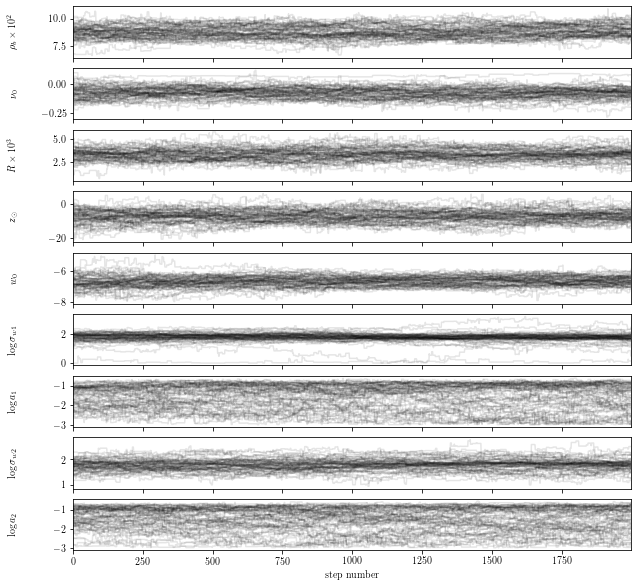

In [17]:
labels = [r'$\rho_b\times 10^2$', r'$\nu_0$', r'$R\times 10^3$', r'$z_{\odot}$', r'$w_0$', r'$\log \sigma_{w1}$', r'$\log a_1$', r'$\log \sigma_{w2}$', r'$\log a_2$']
labs = ['rhob', 'nu0', 'R', 'zsun', 'w0', 'log_sigmaw1', 'log_a1', 'log_sigmaw2', 'log_a2']
indexes = [12, 24, 25, 26, 27, 28, 29, 30, 31]

params = get_params(chain, indexes, labs)
plot_chain(params, labels, figsize=(10,10))

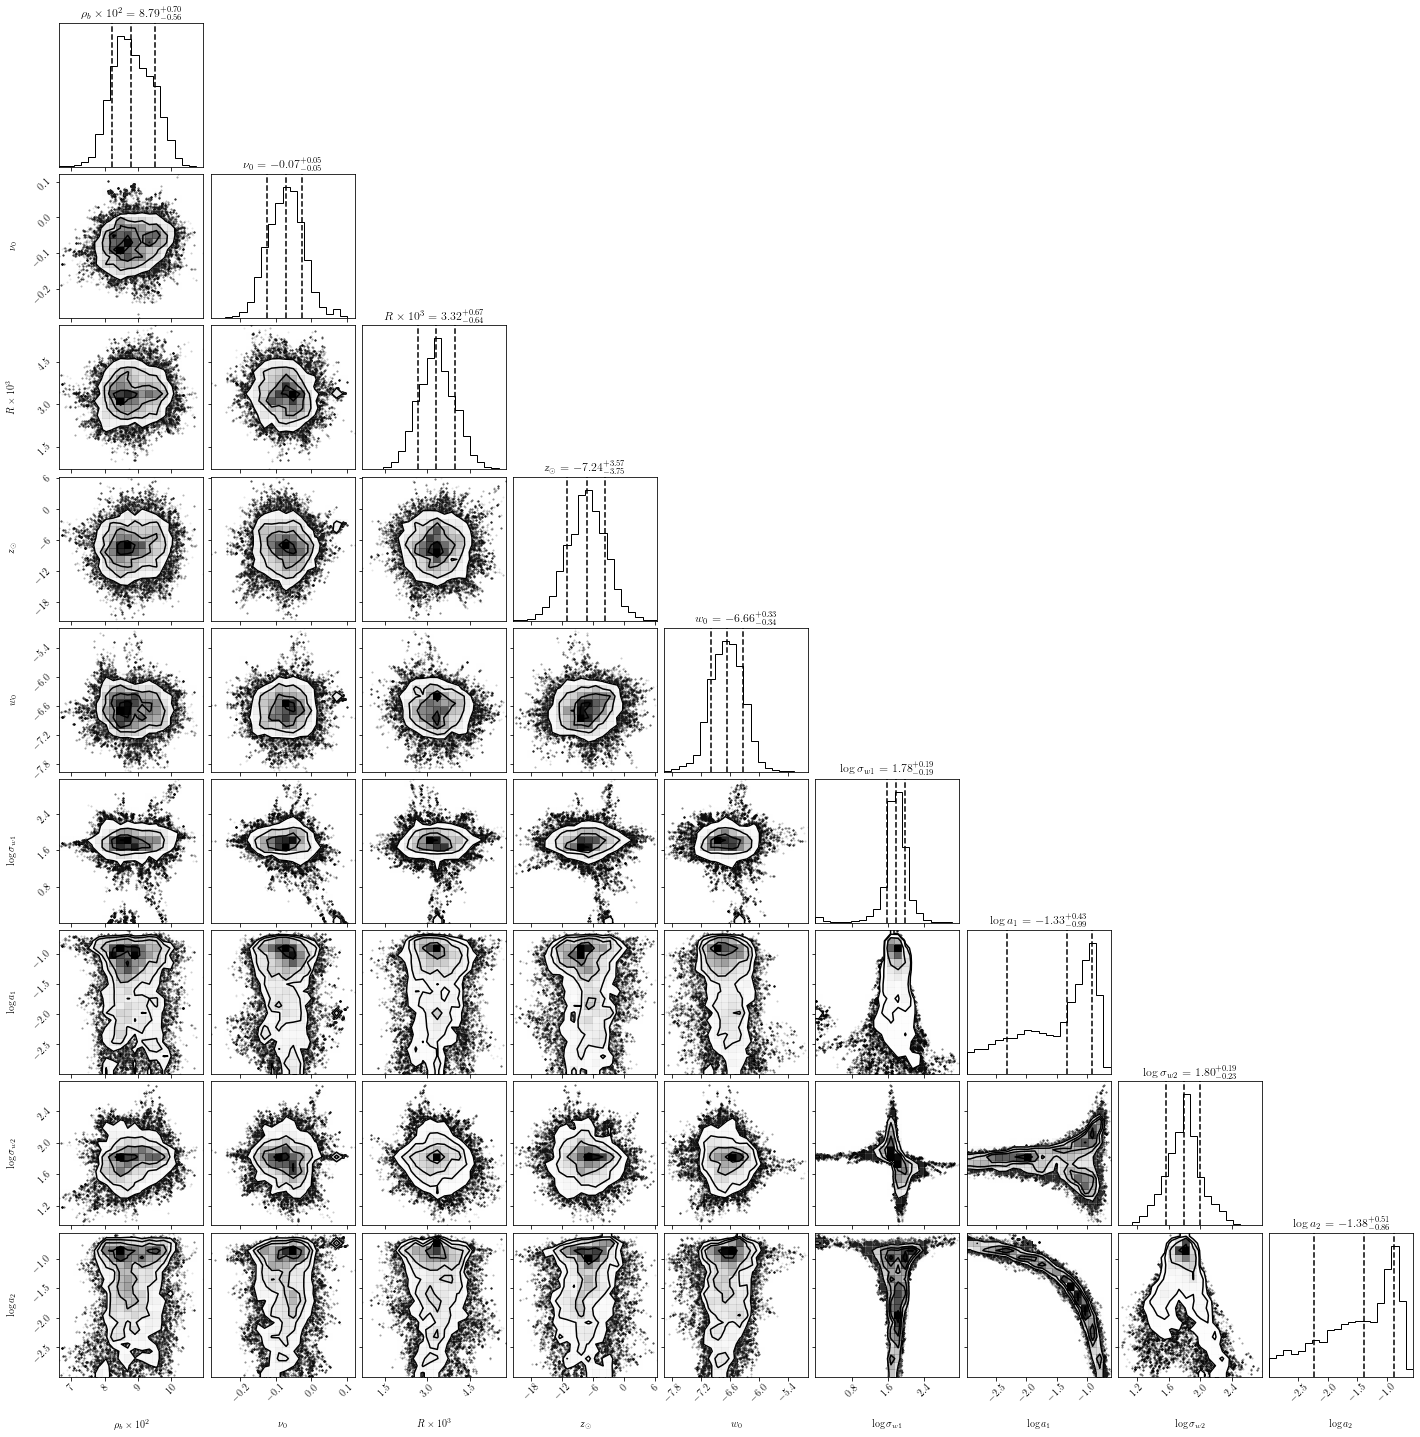

In [18]:
plot_corner(params, labels)

(132000, 32)


100%|██████████| 50000/50000 [00:32<00:00, 1549.49it/s]


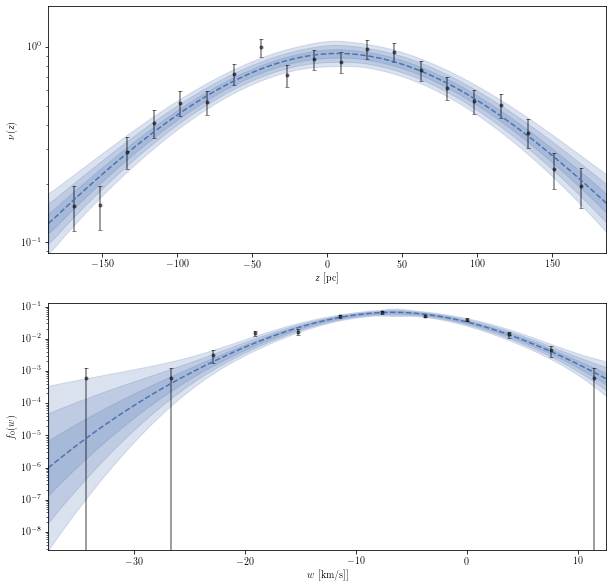

In [19]:
plot_fit(no, zdata, wdata, chain, ndim)

In [20]:
probs = calculate_probs(no, chain, ndim, zdata, wdata, locs, scales)

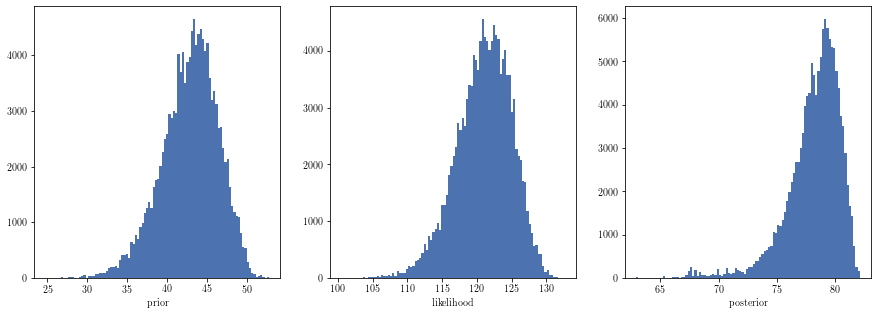

132.61113207047157

In [21]:
prior = probs[:, 0]
likelihood = probs[:, 2]
posterior = probs[:, 1]
# plot histogram of probabilities
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].hist(prior, bins=100)
axes[0].set_xlabel('prior')
axes[1].hist(likelihood, bins=100)
axes[1].set_xlabel('likelihood')
axes[2].hist(posterior, bins=100)
axes[2].set_xlabel('posterior')
plt.show()
likelihood.max()

# educated initial guess!?!

check 1_mock_dm

# Script

do mcmc for

* same $N$, different $z$
* same $z$, different $N$

Each 'running' contains
1. generate_init: initial position for walkers.
    * this is done by the experiment above.
2. run_mcmc: run true mcmc for 10_000 steps.
3. plot trace: plot trace plot for preliminary mcmc.
4. plot corner: plot corner plot for the long run.
5. plot fit: fitting plot for vertical density and vertical dispersion.
6. calculate bic & aic: calculate bic and aic for the long run.

All of these functionalities are implemented in `mcmc.py` at `utils`.

Just run the `program.py` at `script`.
To automate the process for all data, run `run_program.py` at `script`.

# Mock comparison

run mcmc but now for mock data comparison.

`Data/MCMC/dm_mock/mock/comp`

It contains mock data with different number of data points.
1000, 5000, 10000, 20000, 50000, 100000, 200000, 500000, 1000000

This comparison is done to see the prediction power of the model.

In [22]:
from matplotlib import pyplot as plt
import numpy as np
from time import time
from os.path import abspath, join
import sys
from glob import glob
import vaex
from hammer import no
root_dir = abspath(join('..', '..'))
data_dir = join(root_dir, 'Data')
sys.path.append(root_dir)

In [23]:
from utils import style, calculate_probs, plot_chain, plot_corner, plot_fit, get_params

style()

In [24]:
zfiles = glob(join(root_dir, 'Data', 'MCMC', 'dm_mock', 'mock', 'comp', 'z*.hdf5'))
zfiles.sort()
wfiles = glob(join(root_dir, 'Data', 'MCMC', 'dm_mock', 'mock', 'comp','w*.hdf5'))
wfiles.sort()
zfiles, wfiles

(['/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/comp/z_1000.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/comp/z_10000.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/comp/z_100000.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/comp/z_1000000.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/comp/z_5000.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/comp/z_50000.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/comp/z_500000.hdf5'],
 ['/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/comp/w_1000.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/comp/w_10000.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/comp/w_100000.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/comp/w_1000000.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/comp/w_5000.hdf5',
  '/home2/s20321005/Thesis-Project/Data/MCMC/dm_mock/mock/co

In [25]:
index = 0
zfile = zfiles[index]
wfile = wfiles[index]
zdata = vaex.open(zfile)
zmid = zdata['zmid'].to_numpy()
znum = zdata['znum'].to_numpy()
zerr = zdata['zerr'].to_numpy()

wdata = vaex.open(wfile)
wmid = wdata['wmid'].to_numpy()
wnum = wdata['wnum'].to_numpy()
werr = wdata['werr'].to_numpy()

zdata = (zmid, znum, zerr)
wdata = (wmid, wnum, werr)

In [26]:
rhob = [
    0.0104, 0.0277, 0.0073, 0.0005, 0.0006, 0.0018,
    0.0018, 0.0029, 0.0072, 0.0216, 0.0056, 0.0015
]
sigmaz = [
    3.7, 7.1, 22.1, 39.0, 15.5, 7.5, 12.0, 
    18.0, 18.5, 18.5, 20.0, 20.0]
log_nu0 = [0]
R = [3.4E-3]
zsun = [30]
w0 = [-7.]
log_sigmaw1 = [np.log(5.)]
log_a1 = [np.log(0.5)]
log_sigmaw2 = [np.log(10.)]
log_a2 = [np.log(0.1)]

theta = np.array([rhob + sigmaz + log_nu0 + R + zsun+w0 + log_sigmaw1 + log_a1 + log_sigmaw2 + log_a2]).flatten()
theta.shape

(32,)

In [27]:
locs = dict(
    log_nu0=-1,
    R=3.4E-3,
    zsun=-50,
    w0=-15,
    log_sigmaw1=np.log(1),
    log_a1=np.log(0.05),
    log_sigmaw2=np.log(1),
    log_a2=np.log(0.05),
)

scales = dict(
    log_nu0=3,
    R=0.6E-3,
    zsun=100,
    w0=15,
    log_sigmaw1=np.log(25)-locs['log_sigmaw1'],
    log_a1=np.log(2)-locs['log_a1'],
    log_sigmaw2=np.log(25)-locs['log_sigmaw2'],
    log_a2=np.log(2)-locs['log_a2'],
)

keys = list(locs.keys())
locs = np.array(list(locs.values()))
scales = np.array(list(scales.values()))

[(k, loc, th, s+loc) for k, loc, th, s in zip(keys, locs, theta[24:], scales)]

[('log_nu0', -1.0, 0.0, 2.0),
 ('R', 0.0034, 0.0034, 0.004),
 ('zsun', -50.0, 30.0, 50.0),
 ('w0', -15.0, -7.0, 0.0),
 ('log_sigmaw1', 0.0, 1.6094379124341003, 3.2188758248682006),
 ('log_a1', -2.995732273553991, -0.6931471805599453, 0.6931471805599454),
 ('log_sigmaw2', 0.0, 2.302585092994046, 3.2188758248682006),
 ('log_a2', -2.995732273553991, -2.3025850929940455, 0.6931471805599454)]

(32,)


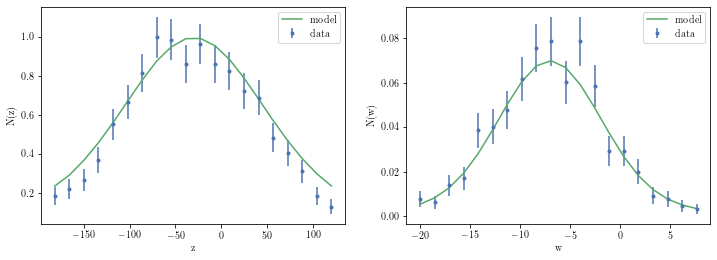

(54.63134921923049, 151.15555191900924)

In [28]:
print(theta.shape)
zmod = no.fz(zmid, theta)
wmod = no.fw(wmid, theta)

# plot
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].errorbar(zmid, znum, yerr=zerr, fmt='.', label='data')
ax[0].plot(zmid, zmod, label='model')
ax[0].set_xlabel('z')
ax[0].set_ylabel('N(z)')
ax[0].legend()
ax[1].errorbar(wmid, wnum, yerr=werr, fmt='.', label='data')
ax[1].plot(wmid, wmod, label='model')
ax[1].set_xlabel('w')
ax[1].set_ylabel('N(w)')
ax[1].legend()
plt.show()
no.log_prob(theta, zdata, wdata, locs, scales)

In [29]:
ndim = len(locs)+24
nwalkers = 2*ndim+2
ndim, nwalkers

(32, 66)

In [30]:
p0 = no.generate_p0(nwalkers, locs, scales, kind=2)
p0.shape

(66, 32)

In [31]:
p0_flat = p0.reshape(-1, ndim)
no.log_prob_par(p0_flat, zdata, wdata, locs, scales)

array([[ 4.46477676e+01, -1.85044194e+03, -1.80579417e+03],
       [ 4.48841923e+01, -1.82889378e+03, -1.78400958e+03],
       [ 4.26017891e+01, -3.11094010e+03, -3.06833831e+03],
       [ 4.20174944e+01, -4.12443552e+03, -4.08241803e+03],
       [ 4.15617413e+01, -2.21425363e+03, -2.17269189e+03],
       [ 4.35929582e+01, -1.25610330e+03, -1.21251034e+03],
       [ 4.03708578e+01, -8.58537274e+02, -8.18166416e+02],
       [ 4.24160531e+01, -1.23429726e+03, -1.19188121e+03],
       [ 4.59719219e+01, -1.61437255e+02, -1.15465333e+02],
       [ 4.65955930e+01, -1.76585708e+03, -1.71926149e+03],
       [ 4.60551434e+01, -2.67823792e+02, -2.21768648e+02],
       [ 4.58968139e+01, -1.14378633e+03, -1.09788952e+03],
       [ 4.46966675e+01, -6.00806892e+02, -5.56110225e+02],
       [ 4.24412113e+01, -3.75033102e+03, -3.70788981e+03],
       [ 4.67525806e+01, -9.08076248e+02, -8.61323667e+02],
       [ 3.99959438e+01, -1.05634595e+03, -1.01635001e+03],
       [ 4.90209503e+01, -3.89538980e+02

In [32]:
t0 = time()
chain = no.mcmc(500, nwalkers, p0, zdata, wdata, locs, scales, dz=1, verbose=True, parallel=True)
print(time() - t0, "s")
chain.shape

3.946843147277832 s


(500, 66, 32)

In [13]:
calculate_probs(no, chain, ndim, zdata, wdata, locs, scales, batch=100)

array([[   44.57174918,  -759.3396411 ,  -714.76789192],
       [   42.61046932,  -375.65904243,  -333.04857311],
       [   35.17883963, -7057.81211632, -7022.63327669],
       ...,
       [   45.5281166 ,   101.75112554,   147.27924215],
       [   46.14243919,    99.84962405,   145.99206324],
       [   40.5243795 ,    94.26271193,   134.78709144]])

100%|██████████| 9/9 [00:00<00:00, 28.12it/s]


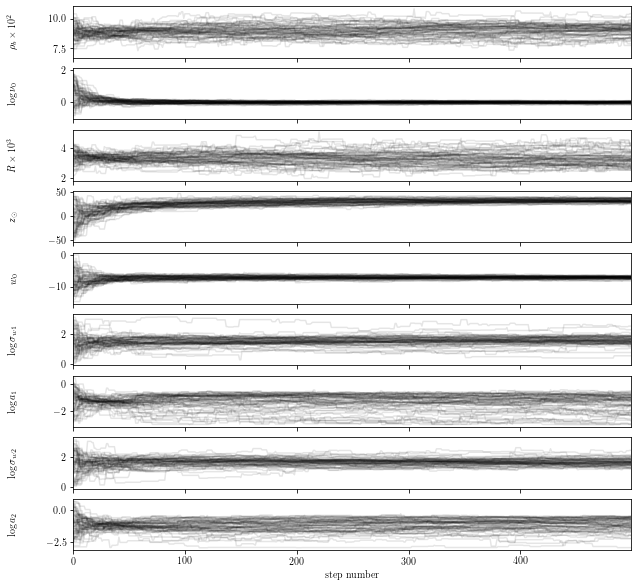

In [33]:
labels = [r'$\rho_b\times 10^2$',  r'$\log \nu_0$', r'$R\times 10^3$', r'$z_{\odot}$', r'$w_0$', r'$\log \sigma_{w1}$', r'$\log a_1$', r'$\log \sigma_{w2}$', r'$\log a_2$']
labs = ['rhob',  'log_nu0', 'R', 'zsun', 'w0', 'log_sigmaw1', 'log_a1', 'log_sigmaw2', 'log_a2']
indexes = [12, 24, 25, 26, 27, 28, 29, 30, 31]

params = get_params(chain, indexes, labs)
plot_chain(params, labels, figsize=(10,10))

In [34]:
p0_next = chain[-1, :, :]
t0 = time()
chain = no.mcmc(2000, nwalkers, p0_next, zdata, wdata, locs, scales, dz=1, verbose=True, parallel=True)
print(time() - t0, "s")
chain.shape

15.257311582565308 s


(2000, 66, 32)

100%|██████████| 12/12 [00:00<00:00, 21.35it/s]


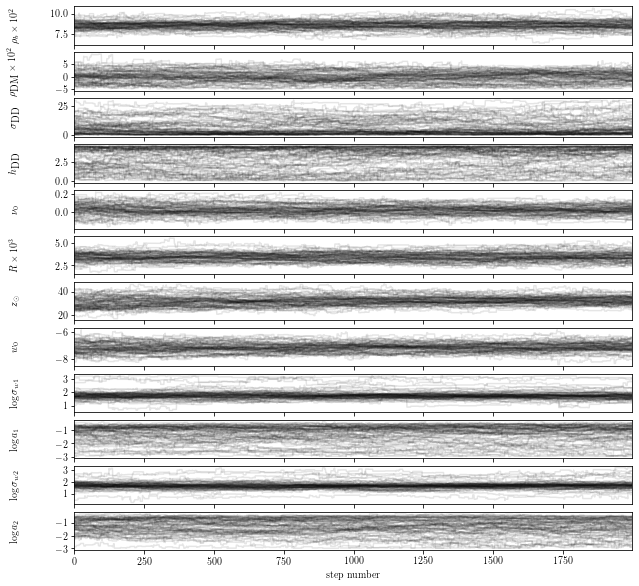

In [32]:
labels = [r'$\rho_b\times 10^2$',  r'$\log \nu_0$', r'$R\times 10^3$', r'$z_{\odot}$', r'$w_0$', r'$\log \sigma_{w1}$', r'$\log a_1$', r'$\log \sigma_{w2}$', r'$\log a_2$']
labs = ['rhob',  'log_nu0', 'R', 'zsun', 'w0', 'log_sigmaw1', 'log_a1', 'log_sigmaw2', 'log_a2']
indexes = [12, 24, 25, 26, 27, 28, 29, 30, 31]

params = get_params(chain, indexes, labs)
plot_chain(params, labels, figsize=(10,10))

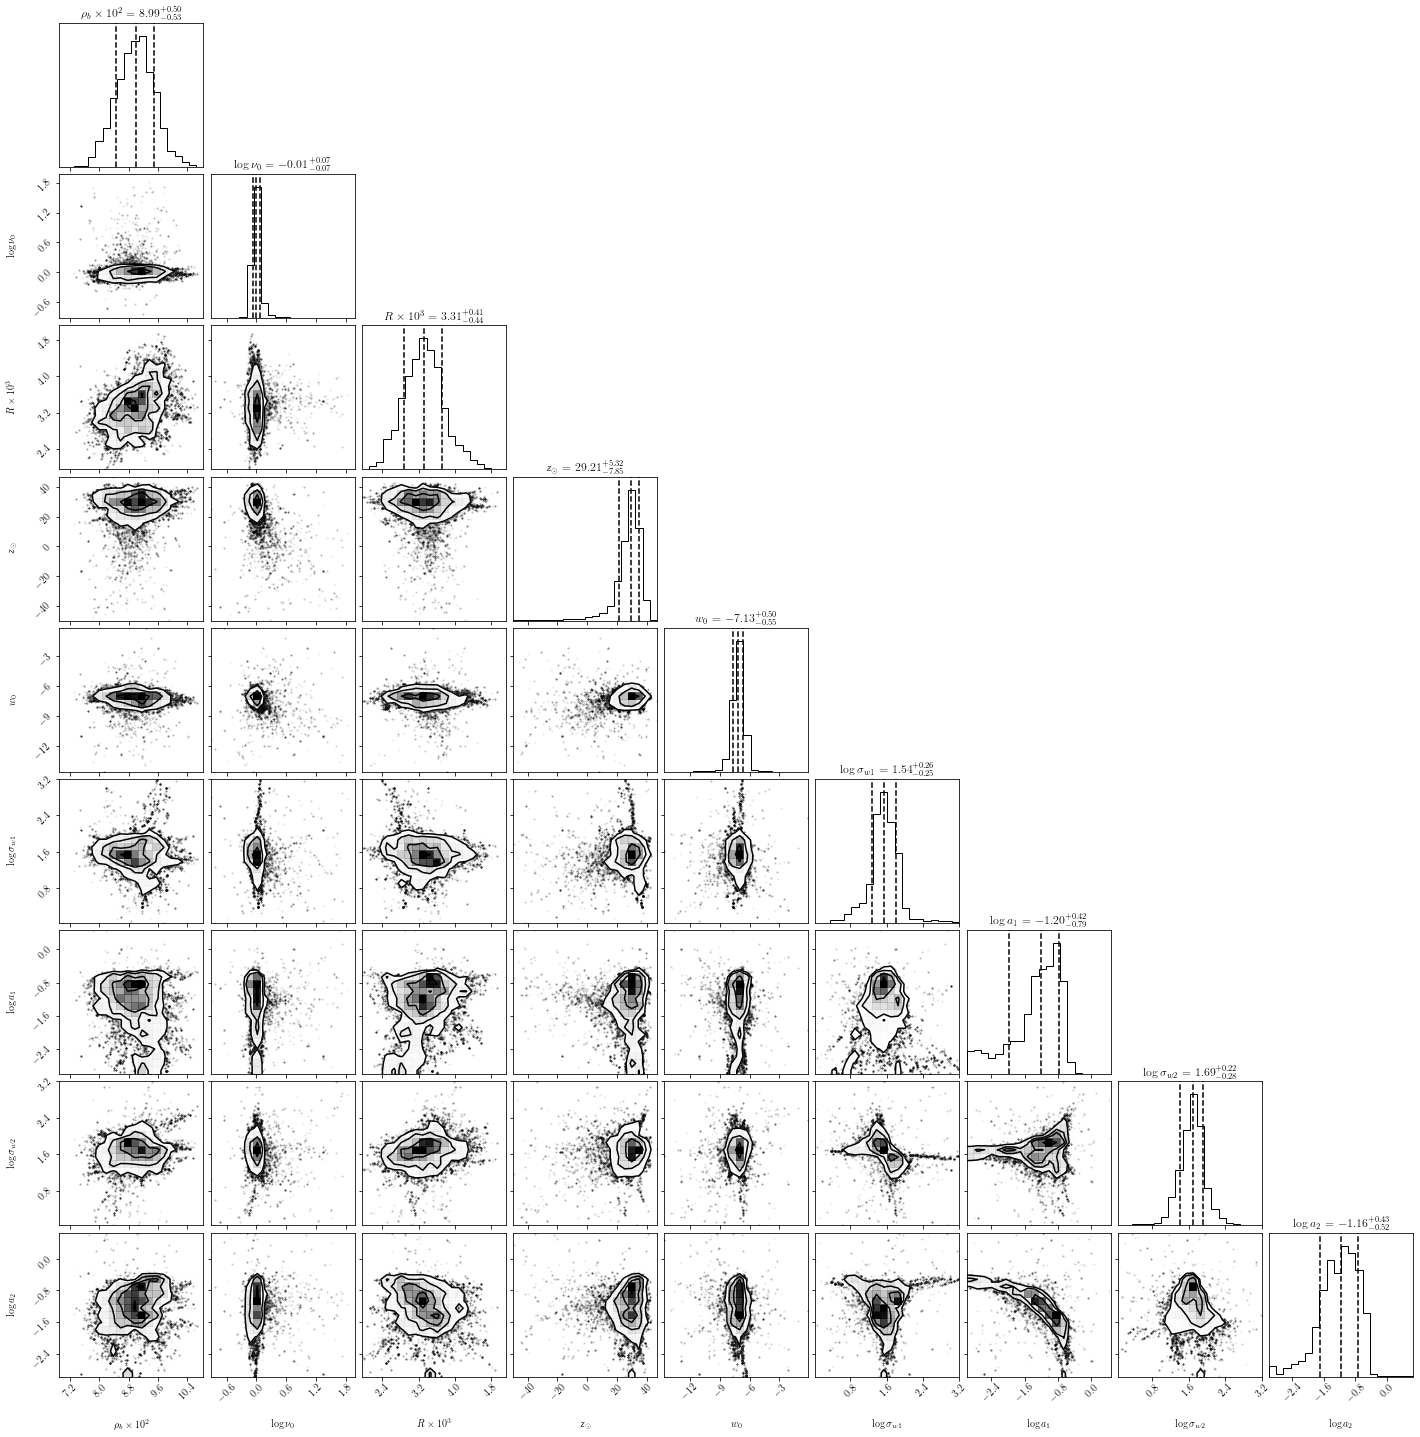

In [35]:
plot_corner(params, labels)

(132000, 32)


100%|██████████| 50000/50000 [00:37<00:00, 1335.55it/s]


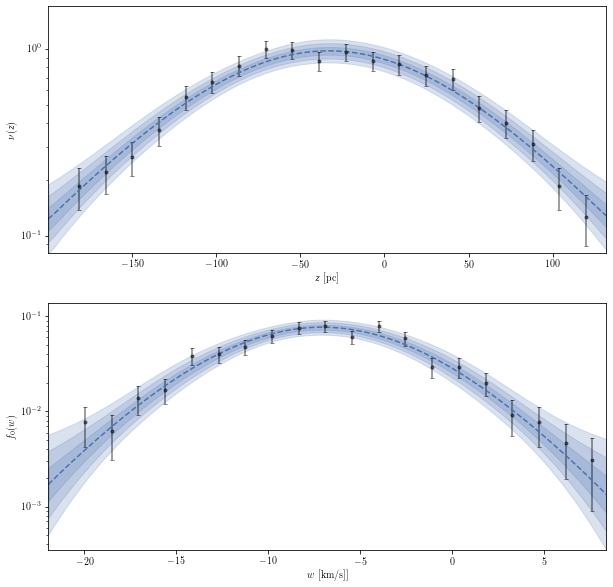

In [36]:
plot_fit(no, zdata, wdata, chain, ndim)

In [37]:
probs = calculate_probs(no, chain, ndim, zdata, wdata, locs, scales)

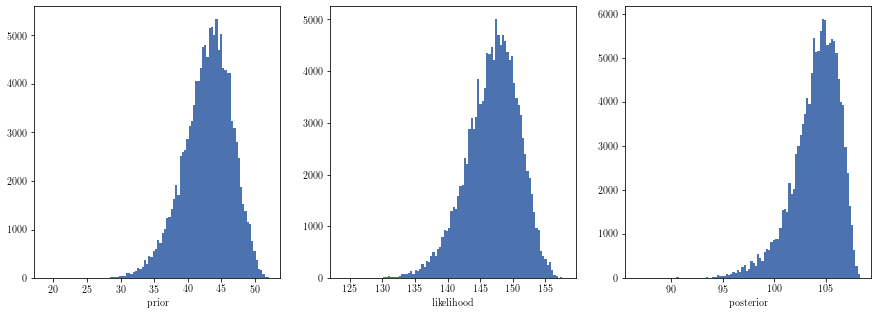

157.91845956653495

In [38]:
prior = probs[:, 0]
likelihood = probs[:, 2]
posterior = probs[:, 1]
# plot histogram of probabilities
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].hist(prior, bins=100)
axes[0].set_xlabel('prior')
axes[1].hist(likelihood, bins=100)
axes[1].set_xlabel('likelihood')
axes[2].hist(posterior, bins=100)
axes[2].set_xlabel('posterior')
plt.show()
likelihood.max()

The script for comparing also implemented in `script` folder.